<p style="text-align:left;">
    <font size="6">Part2</font>


## Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from time import time
from tqdm import tqdm_notebook as tqdm
from collections import Counter
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GroupKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from typing import Any
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from itertools import product
pd.options.display.max_rows
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [7]:
# loading data created after feature engineering
final_data = pd.read_csv('data.csv')
# this dataset contains the mapping between the encoded values and actual values, and was previously in the form of a dictionary,
#because we have two notebooks, had save the dictionary to csv and then load it back in this note book
encoded_values = pd.read_csv('encode_values.csv', index_col = 0)

In [14]:
# this functions retrives the actual value given the encoded value from the encoded_values dataset
def get_actual_value(encoded_values,colName,encodedValues):
    return encoded_values[colName][encoded_values[colName].isin(encodedValues)].index


In [3]:
final_data.shape

(20091, 88)

In [4]:
final_data.head()

,Activity,Assessment,Clip,Game,2050,4100,4230,5000,4235,2060,4110,5010,2070,2075,2080,2081,2083,3110,4010,3120,3121,4020,4021,4022,4025,4030,4031,3010,4035,4040,3020,3021,4045,2000,4050,2010,2020,4070,2025,2030,4080,2035,2040,4090,4220,4095,time_spent_on_Air Show,time_spent_on_All Star Sorting,time_spent_on_Bird Measurer (Assessment),time_spent_on_Bottle Filler (Activity),time_spent_on_Bubble Bath,time_spent_on_Bug Measurer (Activity),time_spent_on_Cart Balancer (Assessment),time_spent_on_Cauldron Filler (Assessment),time_spent_on_Chest Sorter (Assessment),time_spent_on_Chicken Balancer (Activity),time_spent_on_Chow Time,time_spent_on_Crystals Rule,time_spent_on_Dino Dive,time_spent_on_Dino Drink,time_spent_on_Egg Dropper (Activity),time_spent_on_Fireworks (Activity),time_spent_on_Flower Waterer (Activity),time_spent_on_Happy Camel,time_spent_on_Leaf Leader,time_spent_on_Mushroom Sorter (Assessment),time_spent_on_Pan Balance,time_spent_on_Sandcastle Builder (Activity),time_spent_on_Scrub-A-Dub,time_spent_on_Watering Hole (Activity),installation_id,session_title,session_world,total_correct_attempts,total_uncorrect_attempts,duration_mean,total_accuracy,accuracy_group,0,1,2,3,total_accuracy_group,total_actions,installation_session_count,installation_duration_mean,sum_event_code_count,installation_event_code_count_mean
0,3,0,11,4,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,0,20,94,4,18,0,0,6,4,0,0,0,163,0,0,0,0,0,0,0,0,0,0,0,0,0,91,164,0,0,39,0,89,115,0,0006a69f,30,3,0,0,0.000000,0.000000,3,0,0,0,0,0.0,647,6,39.547222,647,1651.166667
1,4,1,14,6,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,1,26,156,5,22,0,1,6,4,0,0,193,163,92,0,0,104,0,0,0,0,0,78,0,0,0,91,164,0,0,39,0,89,115,0,0006a69f,4,3,1,0,39.000000,1.000000,0,0,0,0,1,3.0,1143,6,39.547222,1143,1651.166667
2,4,2,14,6,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,1,27,160,5,22,0,1,6,4,0,0,193,163,92,0,0,104,0,0,0,0,0,78,0,0,0,91,164,0,0,65,0,89,115,0,0006a69f,30,3,1,11,65.500000,0.500000,3,1,0,0,1,1.5,1230,6,39.547222,1230,1651.166667
3,9,3,24,10,9,6,0,5,0,2,13,5,2,0,8,2,5,334,10,25,37,243,29,45,90,314,6,339,14,9,25,37,2,46,0,2,51,348,8,43,0,4,10,4,9,1,193,229,92,165,133,104,0,0,0,0,0,78,0,110,0,1611,254,0,0,73,0,126,195,80,0006a69f,30,3,2,11,52.333333,0.666667,0,1,0,0,2,2.0,2142,6,39.547222,2142,1651.166667
4,9,4,24,10,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,2,52,348,9,43,0,5,10,4,9,1,193,229,92,165,133,104,0,0,0,0,0,78,0,110,0,1611,254,0,0,104,0,126,195,80,0006a69f,30,3,2,11,41.250000,0.500000,2,2,0,0,2,1.5,2159,6,39.547222,2159,1651.166667


## 9 Exploratory Data Analysis

In [5]:
#Changing type of  categorical variables
final_data[['session_title', 'accuracy_group', 'session_world']] = final_data[['session_title', 'accuracy_group', 'session_world']].astype('category')

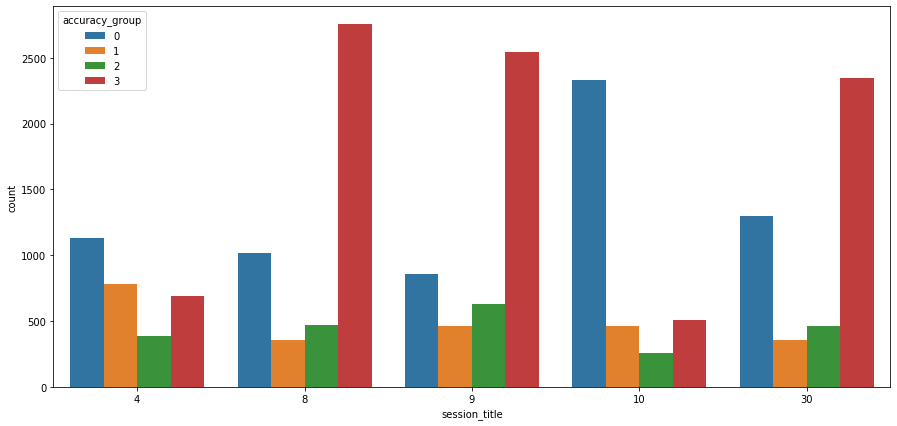

In [12]:
_, axes = plt.subplots(1, 1, sharey=True, figsize=(15, 7))

#get_actual_value(encoded_values,'title',0)
ax = sns.countplot(x = 'session_title', hue = 'accuracy_group', data = final_data, ax=axes)

In [6]:
# label encoding has been done on categorical columns to reduce the memory usage but they were nominal categories so we need to apply one hot encoding
dummy = pd.get_dummies(final_data[['session_title', 'session_world']])

In [8]:
final_data= pd.concat([final_data,dummy], axis =1)

In [9]:
final_data.head()

,Activity,Assessment,Clip,Game,2050,4100,4230,5000,4235,2060,4110,5010,2070,2075,2080,2081,2083,3110,4010,3120,3121,4020,4021,4022,4025,4030,4031,3010,4035,4040,3020,3021,4045,2000,4050,2010,2020,4070,2025,2030,4080,2035,2040,4090,4220,4095,time_spent_on_Air Show,time_spent_on_All Star Sorting,time_spent_on_Bird Measurer (Assessment),time_spent_on_Bottle Filler (Activity),time_spent_on_Bubble Bath,time_spent_on_Bug Measurer (Activity),time_spent_on_Cart Balancer (Assessment),time_spent_on_Cauldron Filler (Assessment),time_spent_on_Chest Sorter (Assessment),time_spent_on_Chicken Balancer (Activity),time_spent_on_Chow Time,time_spent_on_Crystals Rule,time_spent_on_Dino Dive,time_spent_on_Dino Drink,time_spent_on_Egg Dropper (Activity),time_spent_on_Fireworks (Activity),time_spent_on_Flower Waterer (Activity),time_spent_on_Happy Camel,time_spent_on_Leaf Leader,time_spent_on_Mushroom Sorter (Assessment),time_spent_on_Pan Balance,time_spent_on_Sandcastle Builder (Activity),time_spent_on_Scrub-A-Dub,time_spent_on_Watering Hole (Activity),installation_id,session_title,session_world,total_correct_attempts,total_uncorrect_attempts,duration_mean,total_accuracy,accuracy_group,0,1,2,3,total_accuracy_group,total_actions,installation_session_count,installation_duration_mean,sum_event_code_count,installation_event_code_count_mean,session_title_4,session_title_8,session_title_9,session_title_10,session_title_30,session_world_0,session_world_1,session_world_3
0,3,0,11,4,6,0,0,0,0,0,0,0,0,0,4,1,2,77,4,7,9,92,14,31,19,121,0,79,1,0,7,9,0,18,0,0,20,94,4,18,0,0,6,4,0,0,0,163,0,0,0,0,0,0,0,0,0,0,0,0,0,91,164,0,0,39,0,89,115,0,0006a69f,30,3,0,0,0.000000,0.000000,3,0,0,0,0,0.0,647,6,39.547222,647,1651.166667,0,0,0,0,1,0,0,1
1,4,1,14,6,6,5,0,0,0,1,2,0,1,0,4,1,2,223,6,11,16,127,14,31,37,149,0,226,6,2,11,16,0,25,0,1,26,156,5,22,0,1,6,4,0,0,193,163,92,0,0,104,0,0,0,0,0,78,0,0,0,91,164,0,0,39,0,89,115,0,0006a69f,4,3,1,0,39.000000,1.000000,0,0,0,0,1,3.0,1143,6,39.547222,1143,1651.166667,1,0,0,0,0,0,0,1
2,4,2,14,6,6,5,0,0,0,1,13,0,1,0,4,1,2,225,6,22,16,127,14,31,59,171,0,228,6,2,22,16,0,26,0,1,27,160,5,22,0,1,6,4,0,0,193,163,92,0,0,104,0,0,0,0,0,78,0,0,0,91,164,0,0,65,0,89,115,0,0006a69f,30,3,1,11,65.500000,0.500000,3,1,0,0,1,1.5,1230,6,39.547222,1230,1651.166667,0,0,0,0,1,0,0,1
3,9,3,24,10,9,6,0,5,0,2,13,5,2,0,8,2,5,334,10,25,37,243,29,45,90,314,6,339,14,9,25,37,2,46,0,2,51,348,8,43,0,4,10,4,9,1,193,229,92,165,133,104,0,0,0,0,0,78,0,110,0,1611,254,0,0,73,0,126,195,80,0006a69f,30,3,2,11,52.333333,0.666667,0,1,0,0,2,2.0,2142,6,39.547222,2142,1651.166667,0,0,0,0,1,0,0,1
4,9,4,24,10,9,6,0,5,0,2,13,5,2,0,8,2,5,336,10,25,40,243,29,45,93,314,6,341,14,9,25,40,2,47,0,2,52,348,9,43,0,5,10,4,9,1,193,229,92,165,133,104,0,0,0,0,0,78,0,110,0,1611,254,0,0,104,0,126,195,80,0006a69f,30,3,2,11,41.250000,0.500000,2,2,0,0,2,1.5,2159,6,39.547222,2159,1651.166667,0,0,0,0,1,0,0,1


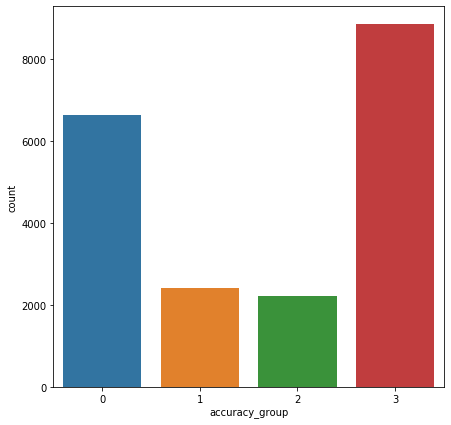

In [13]:
#Count plot of accuracy group
_, axes = plt.subplots(1, 1, sharey=True, figsize=(7, 7))


sns.countplot(x = 'accuracy_group', data = final_data, ax=axes)


**Comment**

Our categorical variables were as number because we applied label encoding on them to reduce memeory and run our code efficiently but now We applied one hot Encoding on them as they were nominal categorical variables. Count plot of accuracy variable indicates that majority classes in our accuracy group are those who solved assessment in first attempt and those who never solved. 


In [15]:
# Here we examined media types( Assessment Clip, Activity and game) to analyze how they are associated with each other
sub_data= pd.concat([final_data['Assessment'], final_data['Clip'], final_data['Activity'], final_data['Game']], axis =1)

In [16]:
sub_data.head()

,Assessment,Clip,Activity,Game
0,0,11,3,4
1,1,14,4,6
2,2,14,4,6
3,3,24,9,10
4,4,24,9,10


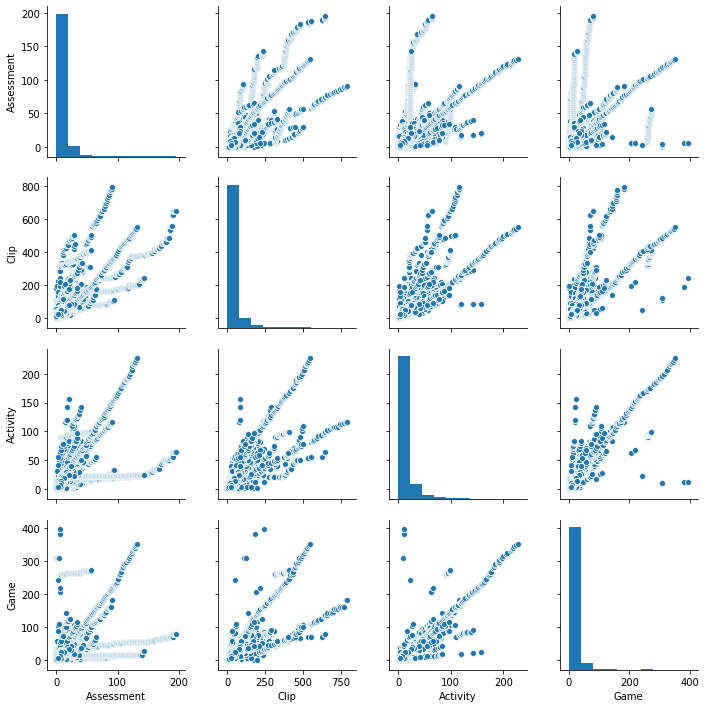

In [17]:
# Pair plot gives us the marginal distributions and joint distributions of columns
sns.pairplot(sub_data)

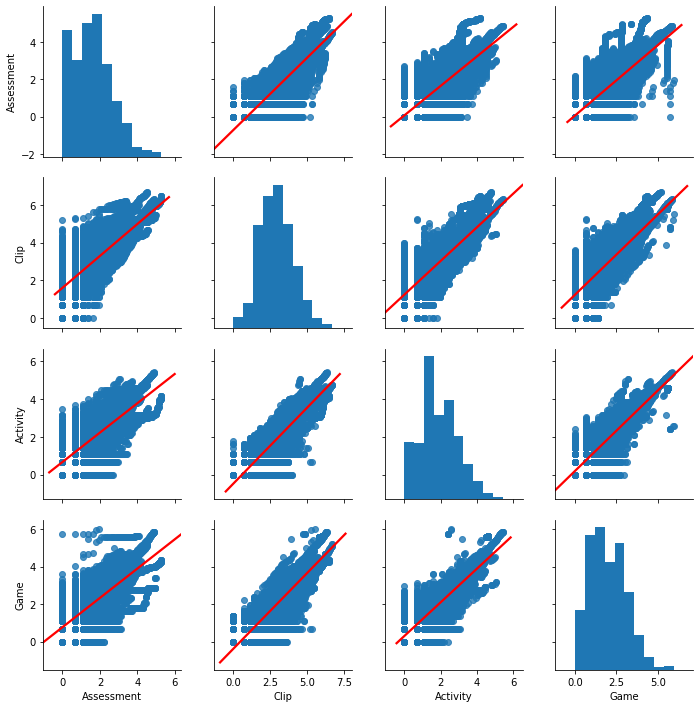

In [18]:
# Plot pairplot with regression line
sns.pairplot(sub_data.apply(lambda x : np.log(x + 1)),kind= "reg", plot_kws={'line_kws':{'color':'red'}})

**Comment**  

 Above pairplot shows that media types (Assessment, Clip, Activity and Game) are positively correlated with each other.

## 10 Data Distribution

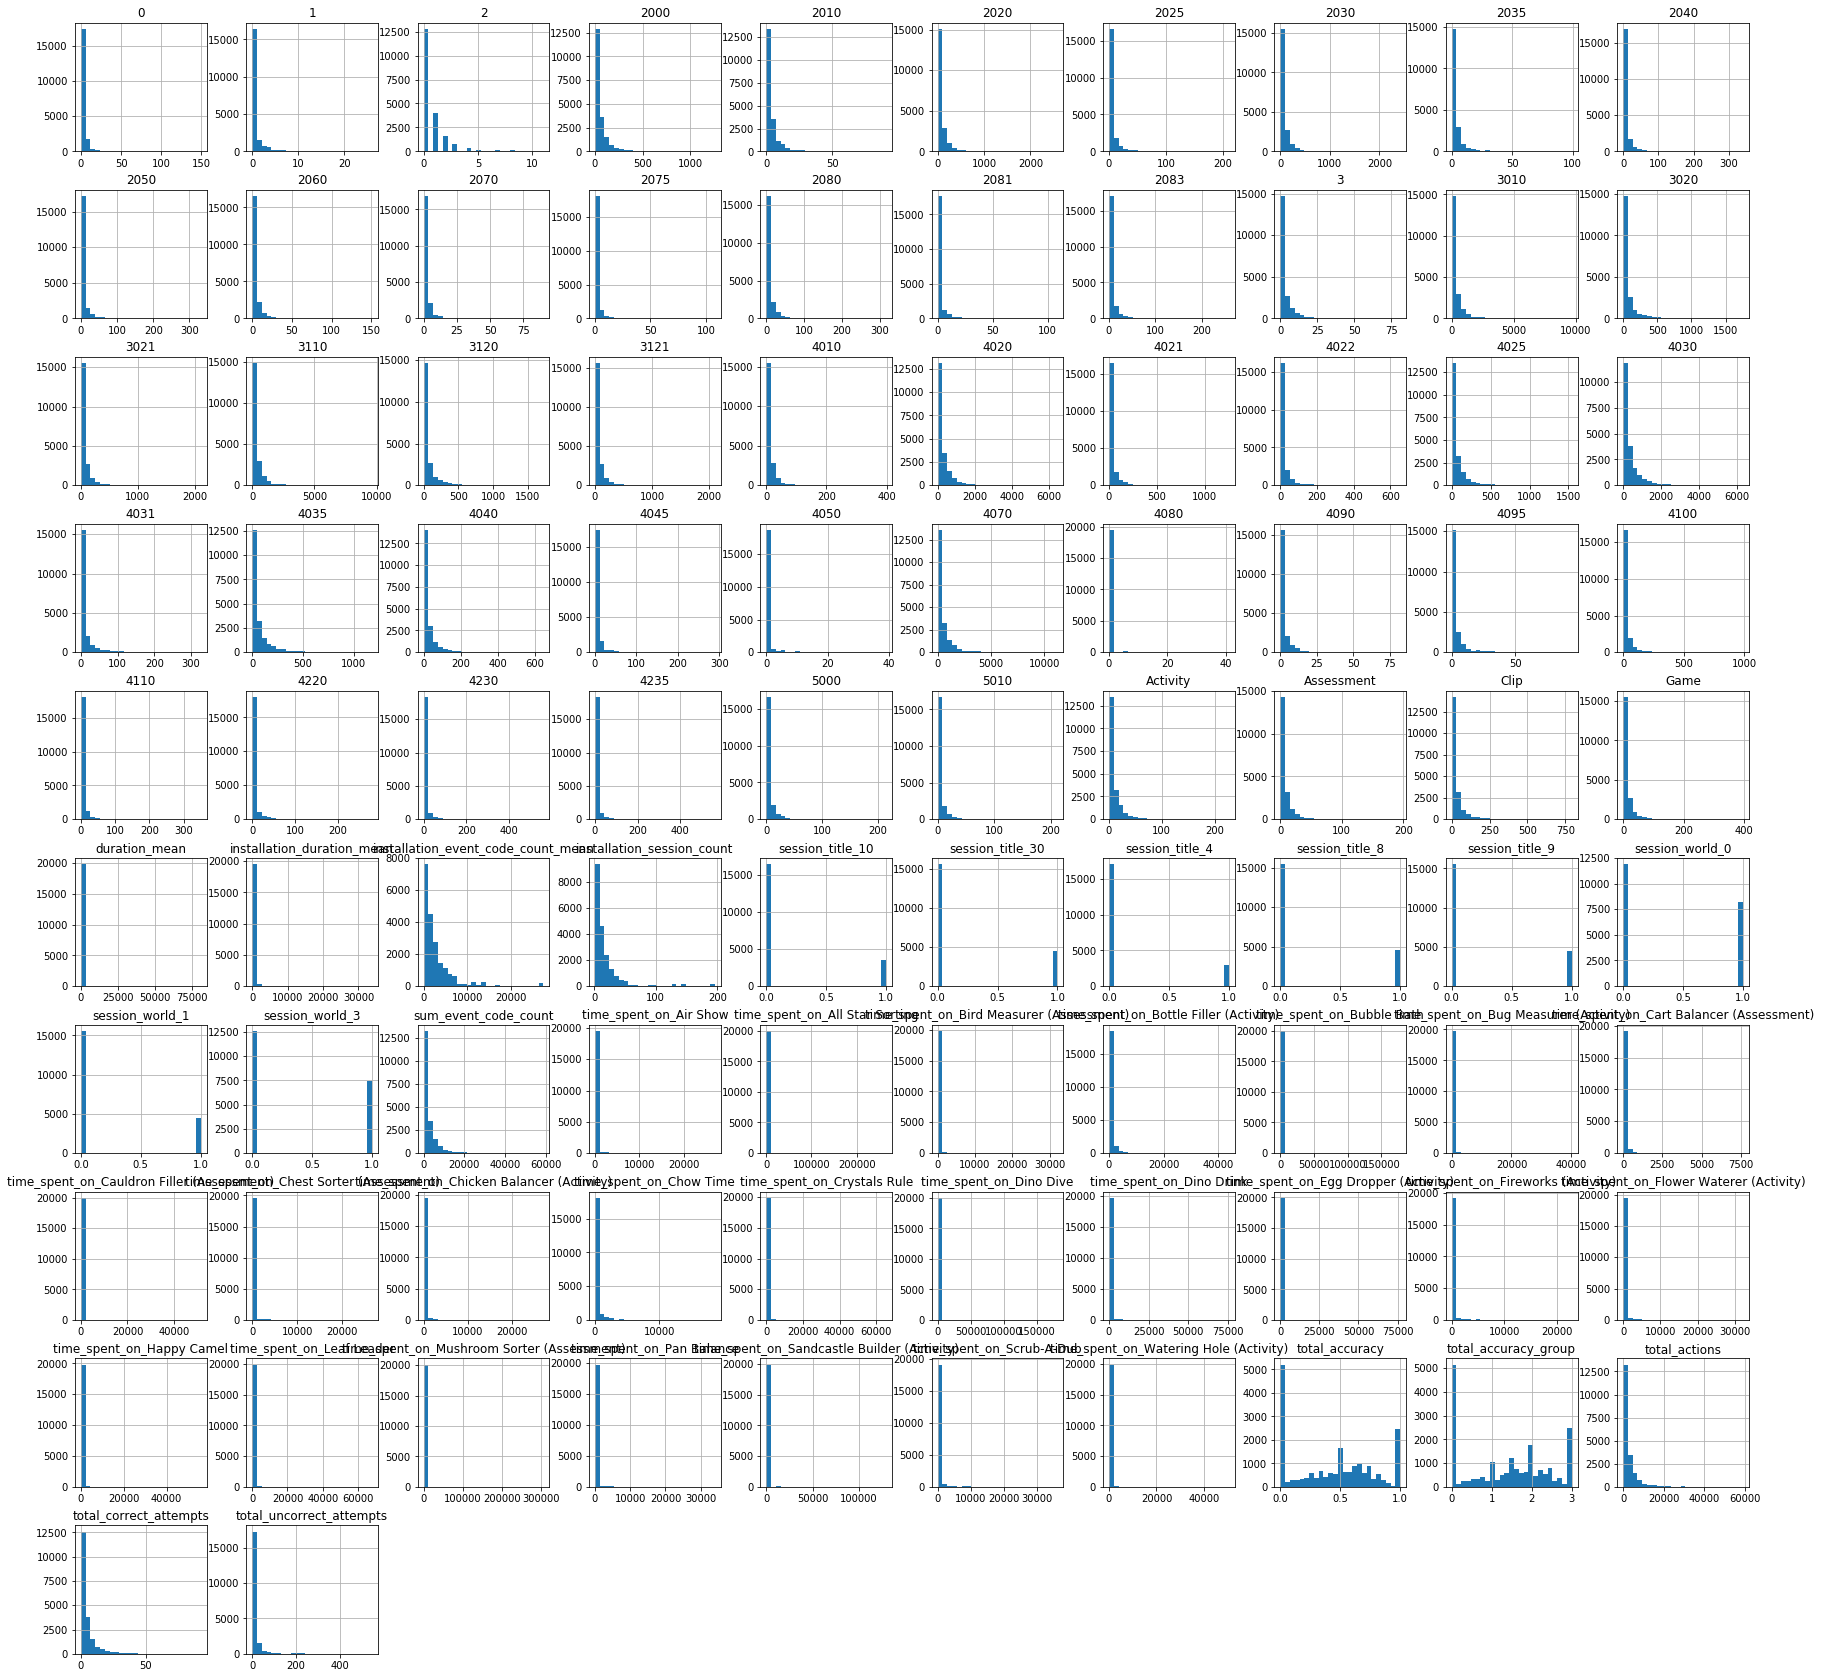

In [20]:
## Data Distribution 
# plotting histogram of each attribute in dataset to observe how data is distributed in each column 
final_data.hist(figsize=(30,30),bins = 25)
plt.show()

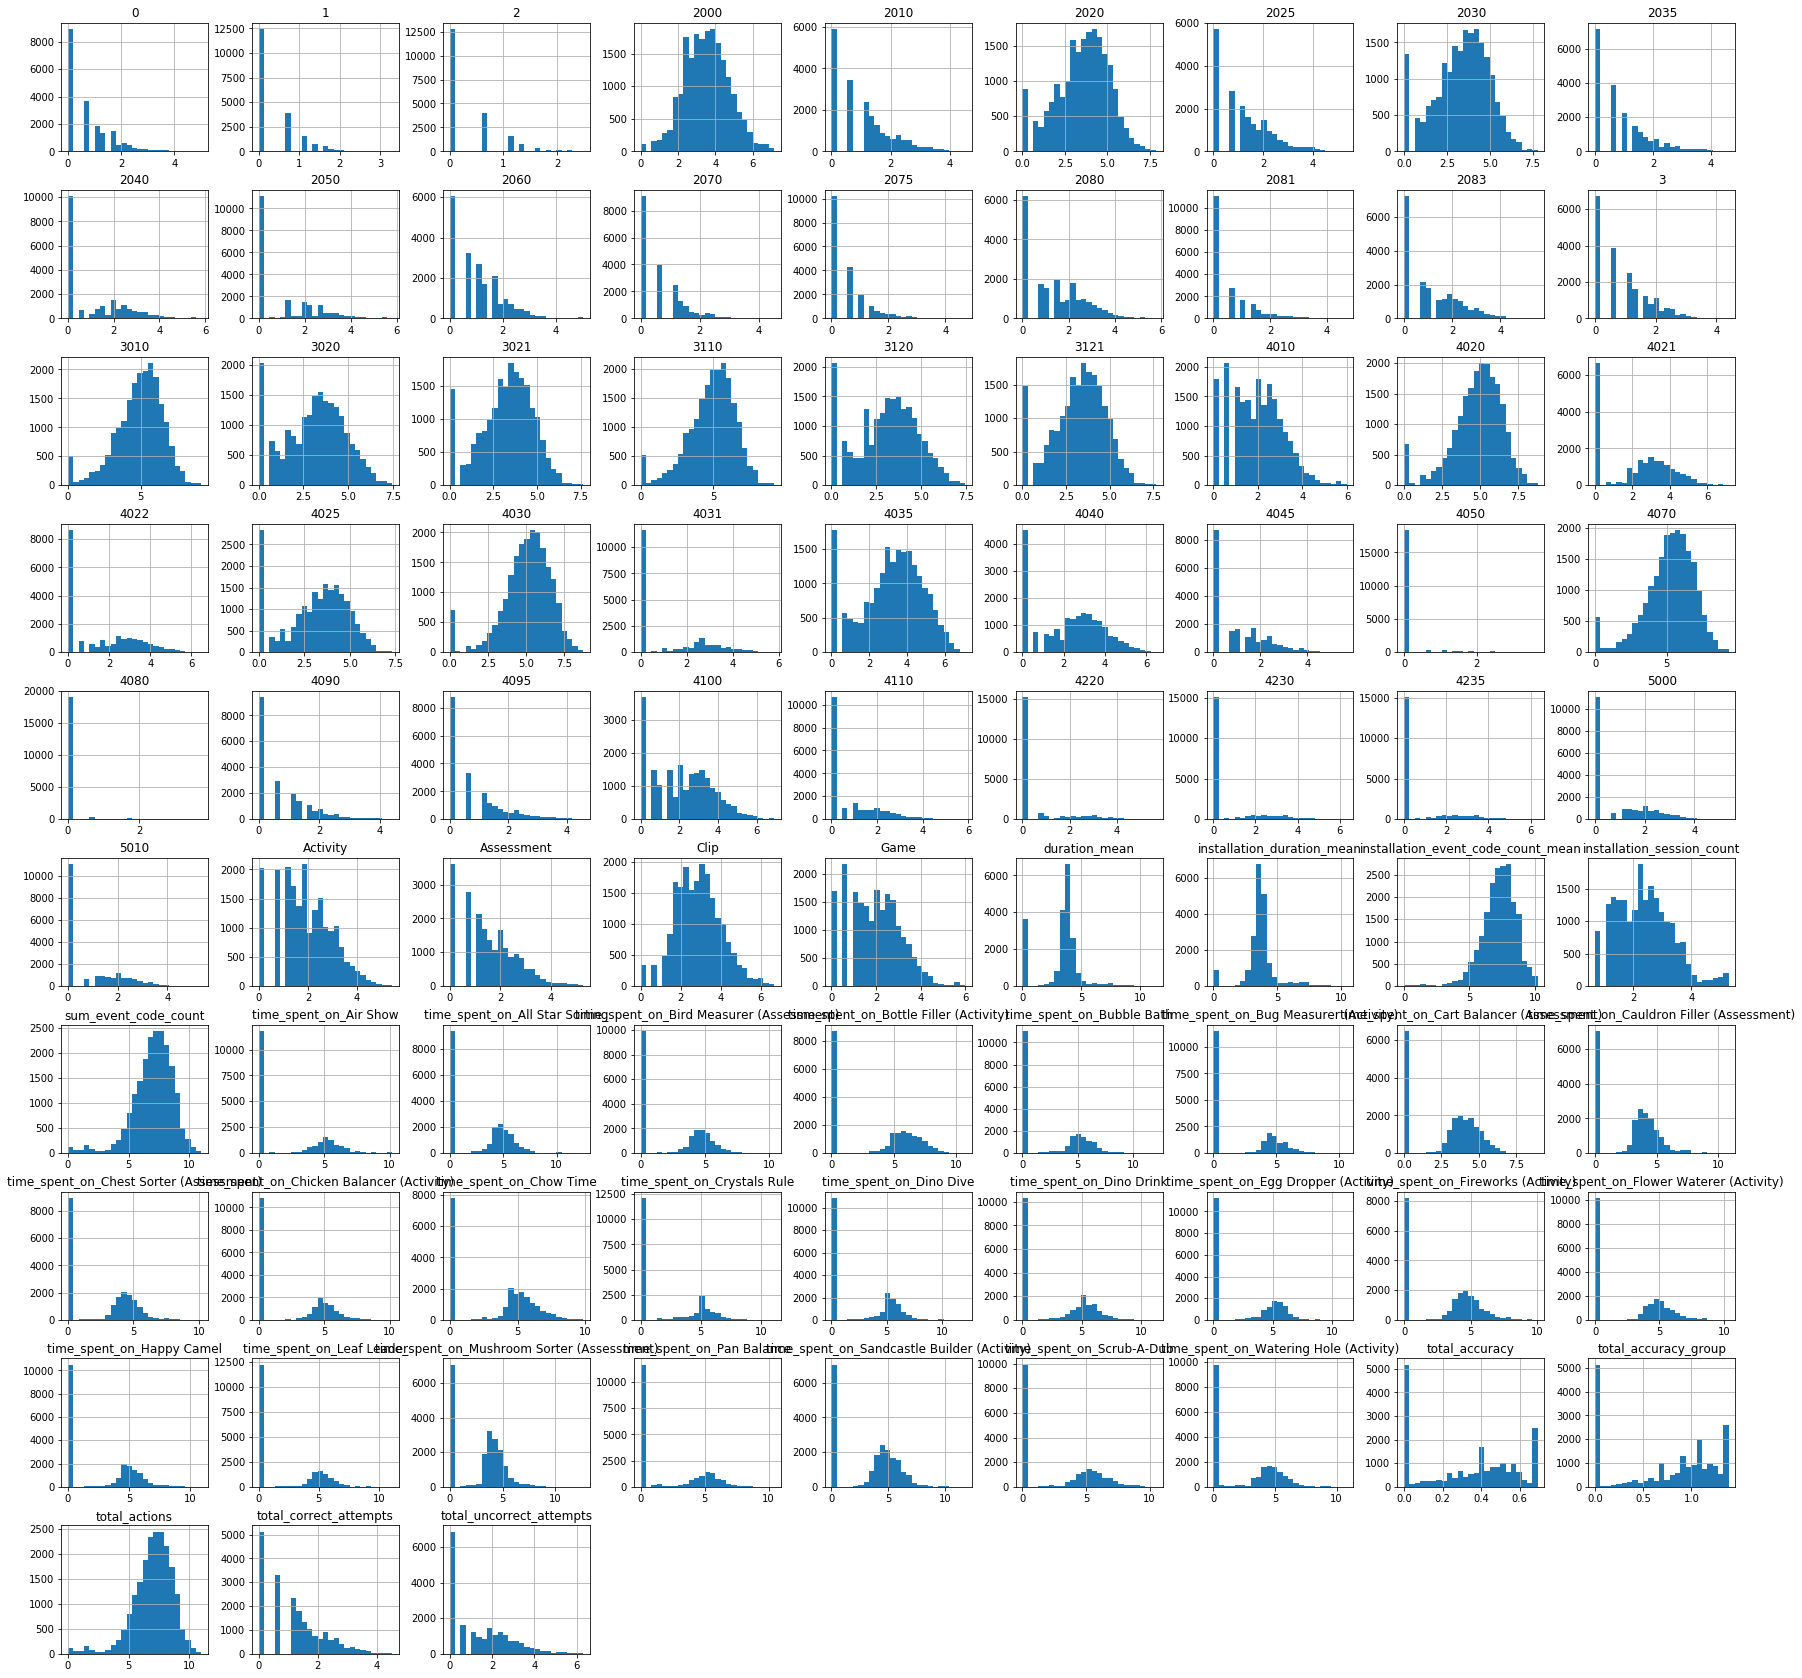

In [21]:
#Applying log transformation on each column of data

numeric = final_data.select_dtypes(['int64', 'float64'])
# add 1 to duration Column to ensure there isnt 0 in any row as log 0 = inf
numeric = numeric.apply(lambda x : np.log(x + 1))
numeric.hist(figsize=(30,30),bins = 25)
plt.show()

**Comment**  

The histogrms above indicated the dsitribution of data is righly skewed, thus log transformation is applied on the columns.

In [22]:
obj = final_data.select_dtypes(['category', 'uint8','object'])
final_data = pd.concat([numeric, obj], axis=1)
## dropping categorical columns which has been encoded
final_data = final_data.drop(['session_title','session_world'],axis=1)

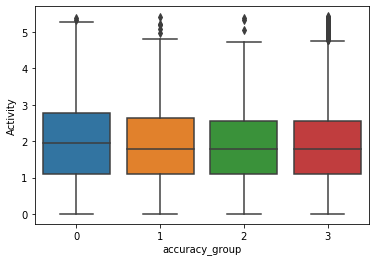

In [43]:
#Association between Activity and Accuracy group
sns.boxplot(x='accuracy_group',y='Activity',data=final_data)

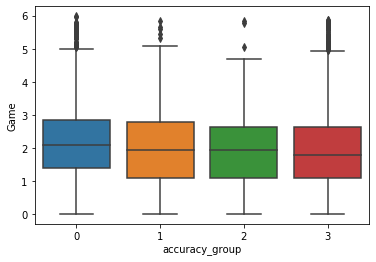

In [47]:
#Game versus Accuracy Group
sns.boxplot(x='accuracy_group',y='Game',data=final_data)

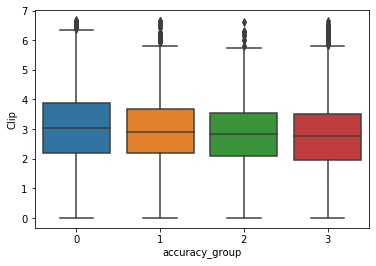

In [49]:
# Clip versus activity
sns.boxplot(x='accuracy_group',y='Clip',data=final_data)

**Comment**

Box plot indicates that players performing activities has no improvement on accuracy as the medians are equivalent. This seems unusual as I would expect higer accuracy for those players who do activities. The same can be said for players who play Game and watch video clips.

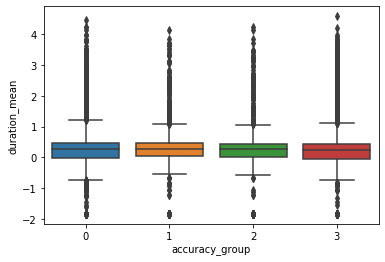

In [104]:
# mean duration time a user spent on the app and accuracy group
sns.boxplot(x='accuracy_group',y='duration_mean',data=final_data)
#The box plot indicates significant number of outliers,  but overall median of each accuracy group is same and there is not muuch variation in the accuracy group.


**Comment**

The box plot indicates significant number of outliers,  but overall median of each accuracy group is same and there is not 
muuch variation in the  classses of accuracy group.


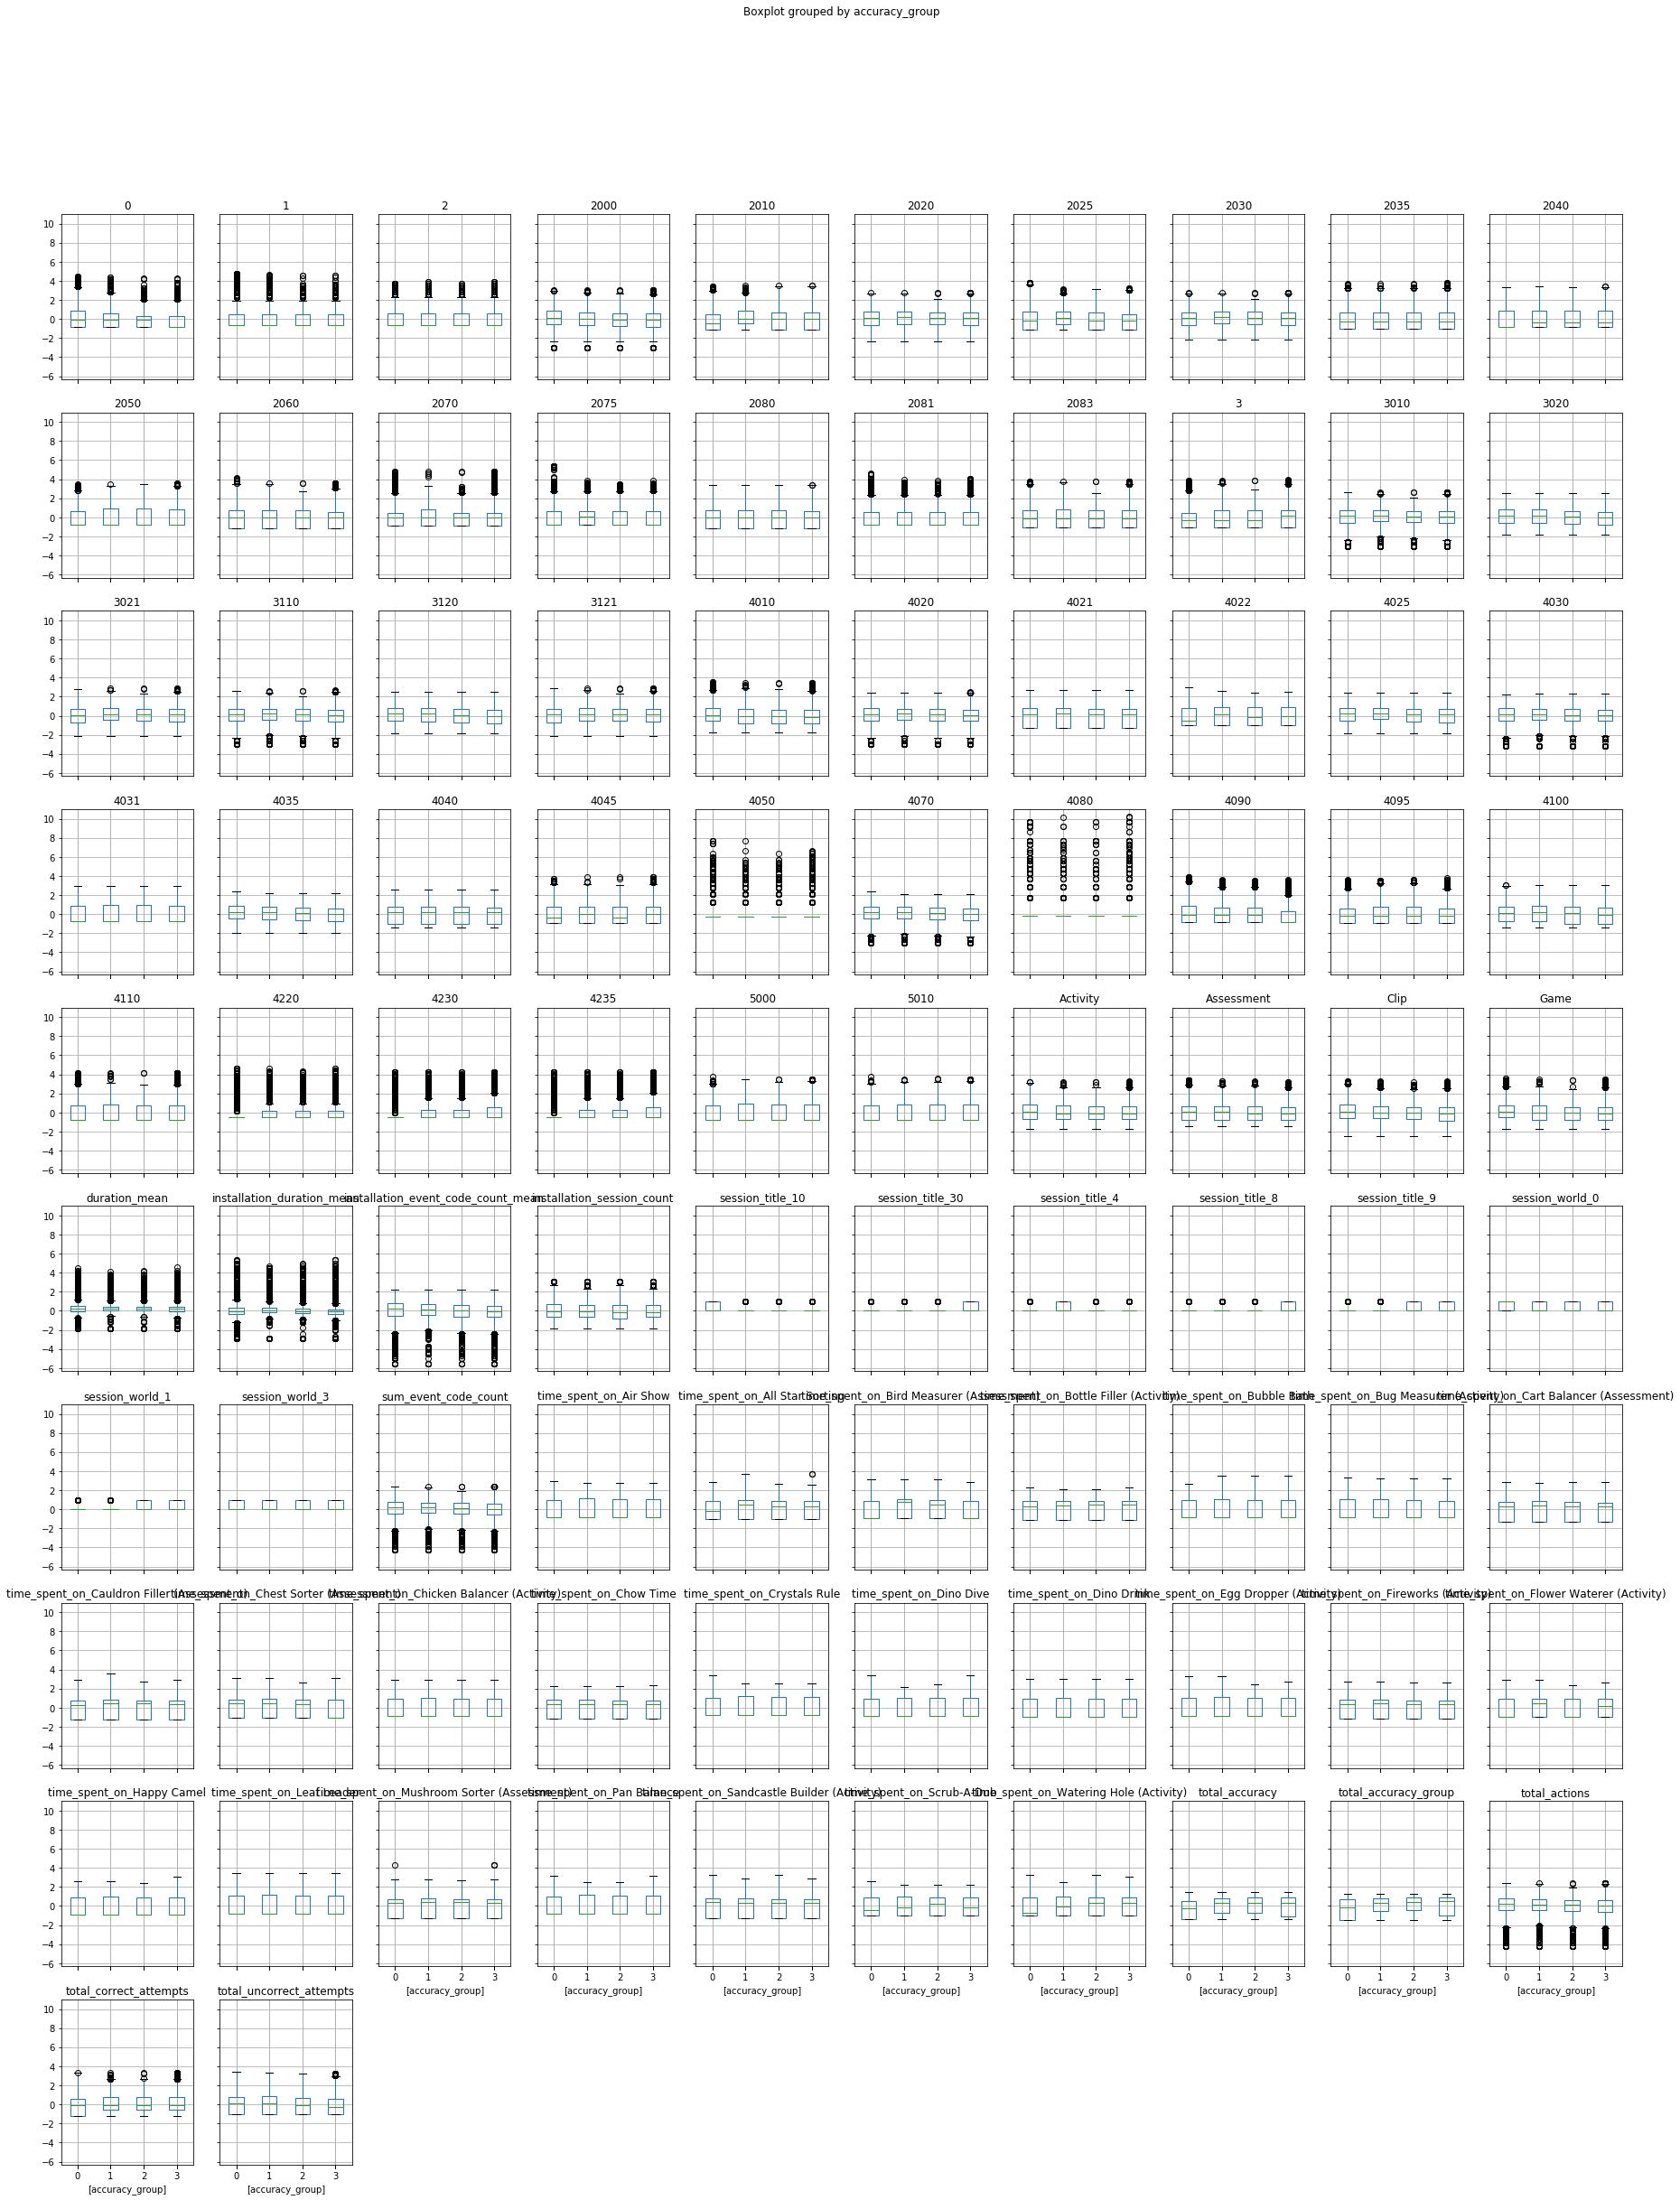

In [115]:
# plotting box plots for each variable in data versus accuracy group to find any interesting association between variables of data and accuracy group. 
final_data.boxplot(by='accuracy_group', figsize=(30,40))
plt.show()

**Comment**

Above box plot indicated some association between accuracy group, time spent on Scrub_A_Dub, and time spend on watering hole activity

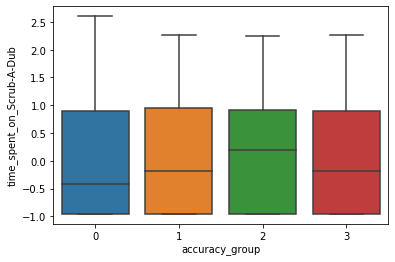

In [119]:
# Accuracy group and time spent on playing Scrub a dub 
sns.boxplot(x='accuracy_group',y='time_spent_on_Scrub-A-Dub',data=final_data)

**Comment**

Box plot does not show  much variation except the medians are not identicles. Also there is not any strong correlation among accuracy group and time spent on Scrub A Dub. one point to notice is that the players who spent more time in playing this game
have attempted assessment in 2nd attempt.

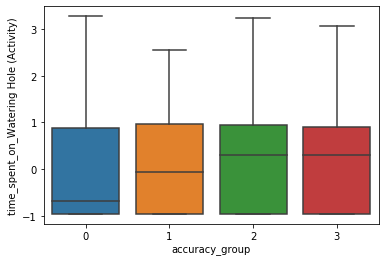

In [120]:
#Accuracy group versus time_spent_on_watering hole activity
sns.boxplot(x='accuracy_group',y='time_spent_on_Watering Hole (Activity)',data=final_data)

**Comment**

Above box plot indicates that data has low variance but medians of each class are not identical. There is positive association between accuracy_group and time_spent_on_Watering Hole (Activity).This means that the users who spent less time in playing this activity had 0 number of corrected attempts of assessment while the users who spent more time in playing this activity has attempted asssesment in first or second attempt.  

## 11 Correlation Matrix

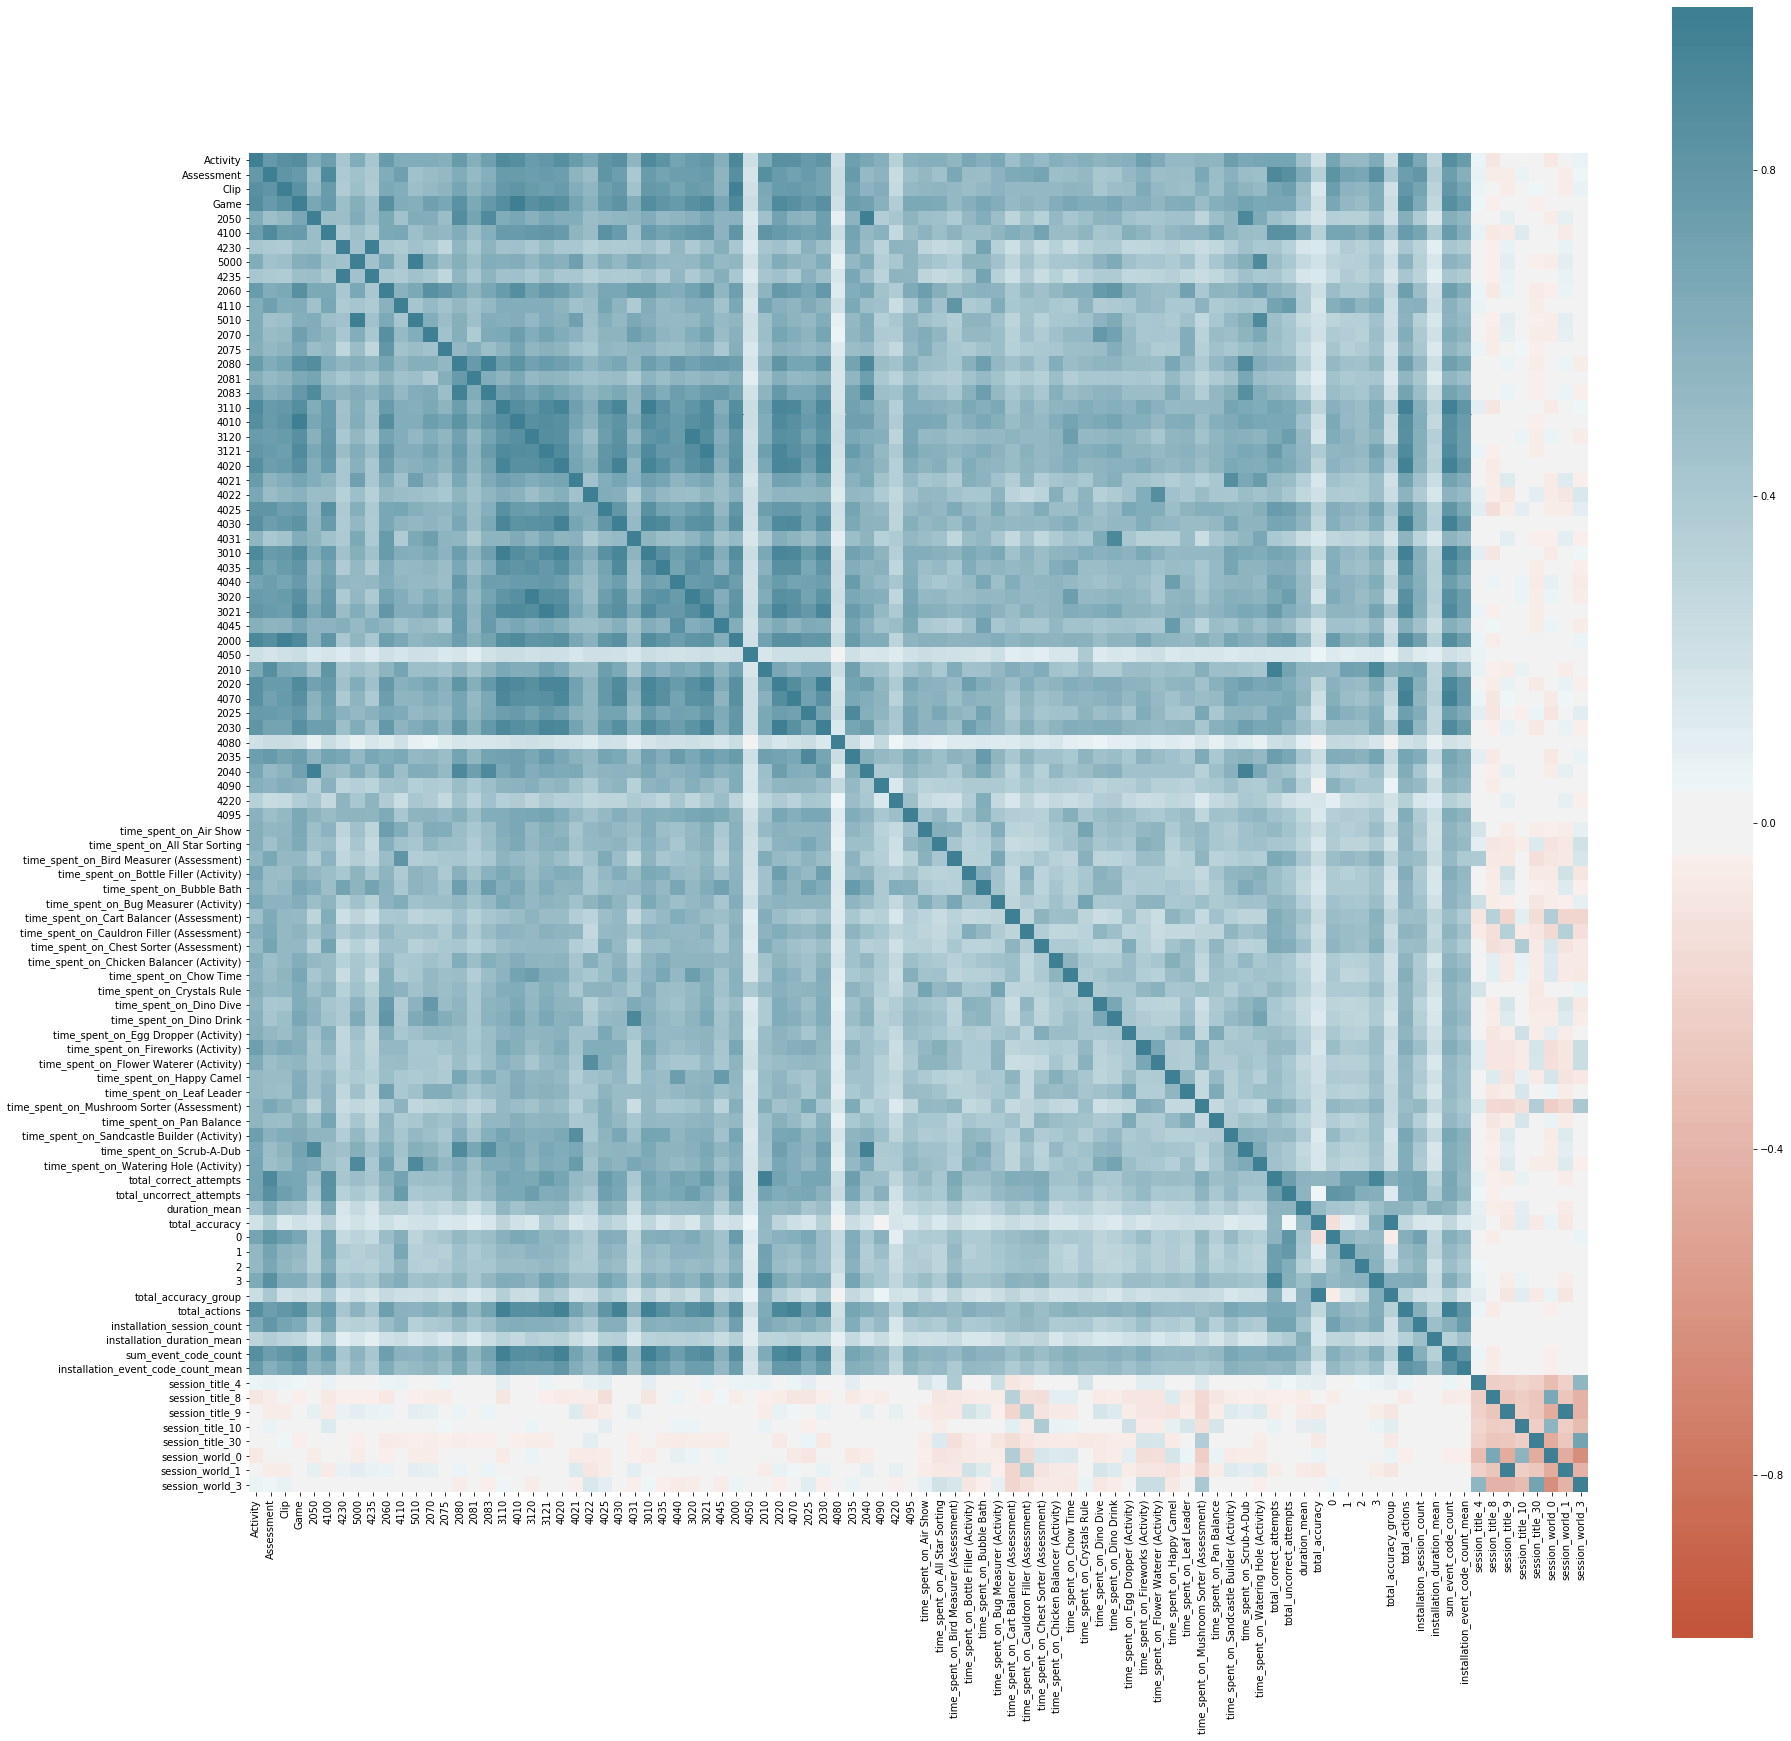

In [117]:
#Correlation Matrix
corr =final_data.corr()
plt.figure(figsize = (30,30))
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(20, 220, n=200),square=True)

**Comment**

Correlation plot indicates significant multicollinearity as shown by the dark blue boxes, thus it is reasonable to apply PCA on this dataset, in order to produce un-correlated components and reduce the dimensionality of the data.

#### Feature Scaling

In [122]:
# standardizing the data so that it has mean 0 and standard deveiation 1
scaler = StandardScaler()

columns_to_scale =final_data.select_dtypes(['int64', 'float64'])

scaling  = scaler.fit_transform(columns_to_scale) 



In [123]:
scaled_df = pd.DataFrame(scaling,columns =columns_to_scale.columns )

In [124]:
obj_1 = final_data.select_dtypes(['uint8', 'category'])
final_data = pd.concat([scaled_df, obj_1], axis=1)

## 12 Dimensionality Reduction Using PCA

In [52]:
filter_col = [col for col in final_data if col != 'accuracy_group']

In [125]:
# X is our set of predictors and Y is response variable
x = final_data[filter_col]
y = final_data.iloc[:,final_data.columns.get_loc("accuracy_group")]

In [126]:
x.shape

(20091, 92)

In [127]:
from sklearn.decomposition import PCA
pca = PCA(n_components= None)
pca.fit_transform(x)

array([[-4.67263834e+00, -1.47888882e+00,  2.19651680e+00, ...,
         1.54242171e-15,  1.22645356e-14, -3.90668613e-15],
       [-1.68394511e+00,  5.90328158e-01,  2.56425706e-02, ...,
        -1.20024846e-14,  2.18852043e-15,  4.69606313e-15],
       [-1.12815609e+00,  1.15158991e+00,  9.59830495e-01, ...,
         1.42202709e-15, -3.23844070e-15,  1.26613991e-15],
       ...,
       [-5.39771378e+00, -1.36796017e+00,  3.28345527e+00, ...,
         4.43512727e-16,  2.92096344e-16, -1.72561612e-16],
       [-3.35229917e+00,  9.03852152e-01,  2.40489917e+00, ...,
         7.93671815e-16,  3.24713552e-16, -3.10199866e-16],
       [-2.77157249e+00,  9.79178758e-01,  2.79538378e+00, ...,
        -7.44972106e-16,  3.65222989e-17,  1.98422008e-16]])

In [128]:
pca.get_covariance()

array([[ 1.00004978,  0.78696728,  0.8526631 , ..., -0.04057264,
         0.00913271,  0.03143993],
       [ 0.78696728,  1.00004978,  0.81291743, ...,  0.00184026,
        -0.02376005,  0.02191979],
       [ 0.8526631 ,  0.81291743,  1.00004978, ..., -0.01153968,
        -0.02493311,  0.03647279],
       ...,
       [-0.04057264,  0.00184026, -0.01153968, ...,  0.24116715,
        -0.09070795, -0.1504592 ],
       [ 0.00913271, -0.02376005, -0.02493311, ..., -0.09070795,
         0.17351954, -0.08281159],
       [ 0.03143993,  0.02191979,  0.03647279, ..., -0.1504592 ,
        -0.08281159,  0.2332708 ]])

In [129]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([5.28851708e-01, 5.67087134e-02, 3.43467163e-02, 3.26762180e-02,
       3.06097609e-02, 2.61909944e-02, 2.26969622e-02, 1.85079182e-02,
       1.47942882e-02, 1.35804434e-02, 1.25744953e-02, 1.17926513e-02,
       1.05349122e-02, 1.03417727e-02, 9.74872038e-03, 9.22179734e-03,
       8.32046791e-03, 7.79032411e-03, 7.41242988e-03, 6.86963187e-03,
       6.73492019e-03, 6.40250806e-03, 6.06519322e-03, 5.89666456e-03,
       5.30634828e-03, 5.22234203e-03, 4.83398324e-03, 4.73544715e-03,
       4.61526801e-03, 4.48814552e-03, 4.35281519e-03, 4.10801580e-03,
       3.99819723e-03, 3.63383566e-03, 3.54150896e-03, 3.48876548e-03,
       3.26656680e-03, 3.09757315e-03, 3.02013274e-03, 2.94871054e-03,
       2.72047857e-03, 2.47167241e-03, 2.24752373e-03, 2.13170460e-03,
       1.91299711e-03, 1.85953018e-03, 1.47625270e-03, 1.39062713e-03,
       1.34401100e-03, 1.27925687e-03, 1.22960409e-03, 1.19753834e-03,
       1.13343126e-03, 1.06991837e-03, 1.05094386e-03, 1.00943662e-03,
      

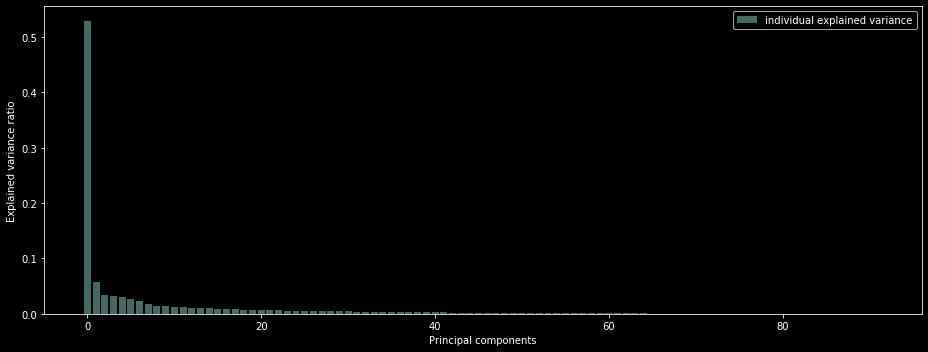

In [130]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(13,5))
    pos = np.arange(92)
    com = np.array(explained_variance)

    plt.bar(pos, com, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Thus we can see from the above plot that first component constitute most of the variance. We will choose all the components which make 90 percent variance of th data altogether.

In [131]:
# Build a model that will return two principal components
pca=PCA(n_components=0.9)
x_new=pca.fit_transform(x)
x_new

array([[-4.67263834, -1.47888882,  2.1965168 , ...,  0.55751657,
        -0.67945757, -0.79976251],
       [-1.68394511,  0.59032816,  0.02564257, ...,  0.76576784,
        -0.5725151 , -0.81804008],
       [-1.12815609,  1.15158991,  0.95983049, ...,  0.40996198,
        -0.61688711, -0.68852691],
       ...,
       [-5.39771378, -1.36796017,  3.28345527, ..., -1.36320583,
        -0.72052694, -0.81333416],
       [-3.35229917,  0.90385215,  2.40489917, ..., -1.50297844,
        -0.42814729,  0.41980122],
       [-2.77157249,  0.97917876,  2.79538378, ..., -1.85548949,
        -0.89046   , -0.41722646]])

In [132]:
pca.get_covariance()

array([[ 1.05336049,  0.78625281,  0.83870367, ..., -0.03968079,
         0.00947658,  0.03020421],
       [ 0.78625281,  1.08457279,  0.8165225 , ...,  0.00373042,
        -0.02313511,  0.01940469],
       [ 0.83870367,  0.8165225 ,  0.97009885, ..., -0.00639537,
        -0.03135015,  0.03774552],
       ...,
       [-0.03968079,  0.00373042, -0.00639537, ...,  0.27977264,
        -0.05134755, -0.1059634 ],
       [ 0.00947658, -0.02313511, -0.03135015, ..., -0.05134755,
         0.21793088, -0.04412165],
       [ 0.03020421,  0.01940469,  0.03774552, ..., -0.1059634 ,
        -0.04412165,  0.27254673]])

In [133]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.52885171, 0.05670871, 0.03434672, 0.03267622, 0.03060976,
       0.02619099, 0.02269696, 0.01850792, 0.01479429, 0.01358044,
       0.0125745 , 0.01179265, 0.01053491, 0.01034177, 0.00974872,
       0.0092218 , 0.00832047, 0.00779032, 0.00741243, 0.00686963,
       0.00673492, 0.00640251, 0.00606519, 0.00589666, 0.00530635])

In [134]:
sum(explained_variance)

0.9039765604925729

In [140]:
ps = pd.DataFrame(x_new)# making data frame of all the PCA components
ps.shape

(20091, 25)

First 25 principle components show 90% variance of the data 

In [141]:
ps.columns = ['PC'+str(i+1) for i in range(len(ps.columns))]

### 12.1 PCA Loadings

In [143]:
#Loadings are correlation between original variable and pca components
loadings = pd.DataFrame(pca.components_, columns=x.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(ps.columns))]

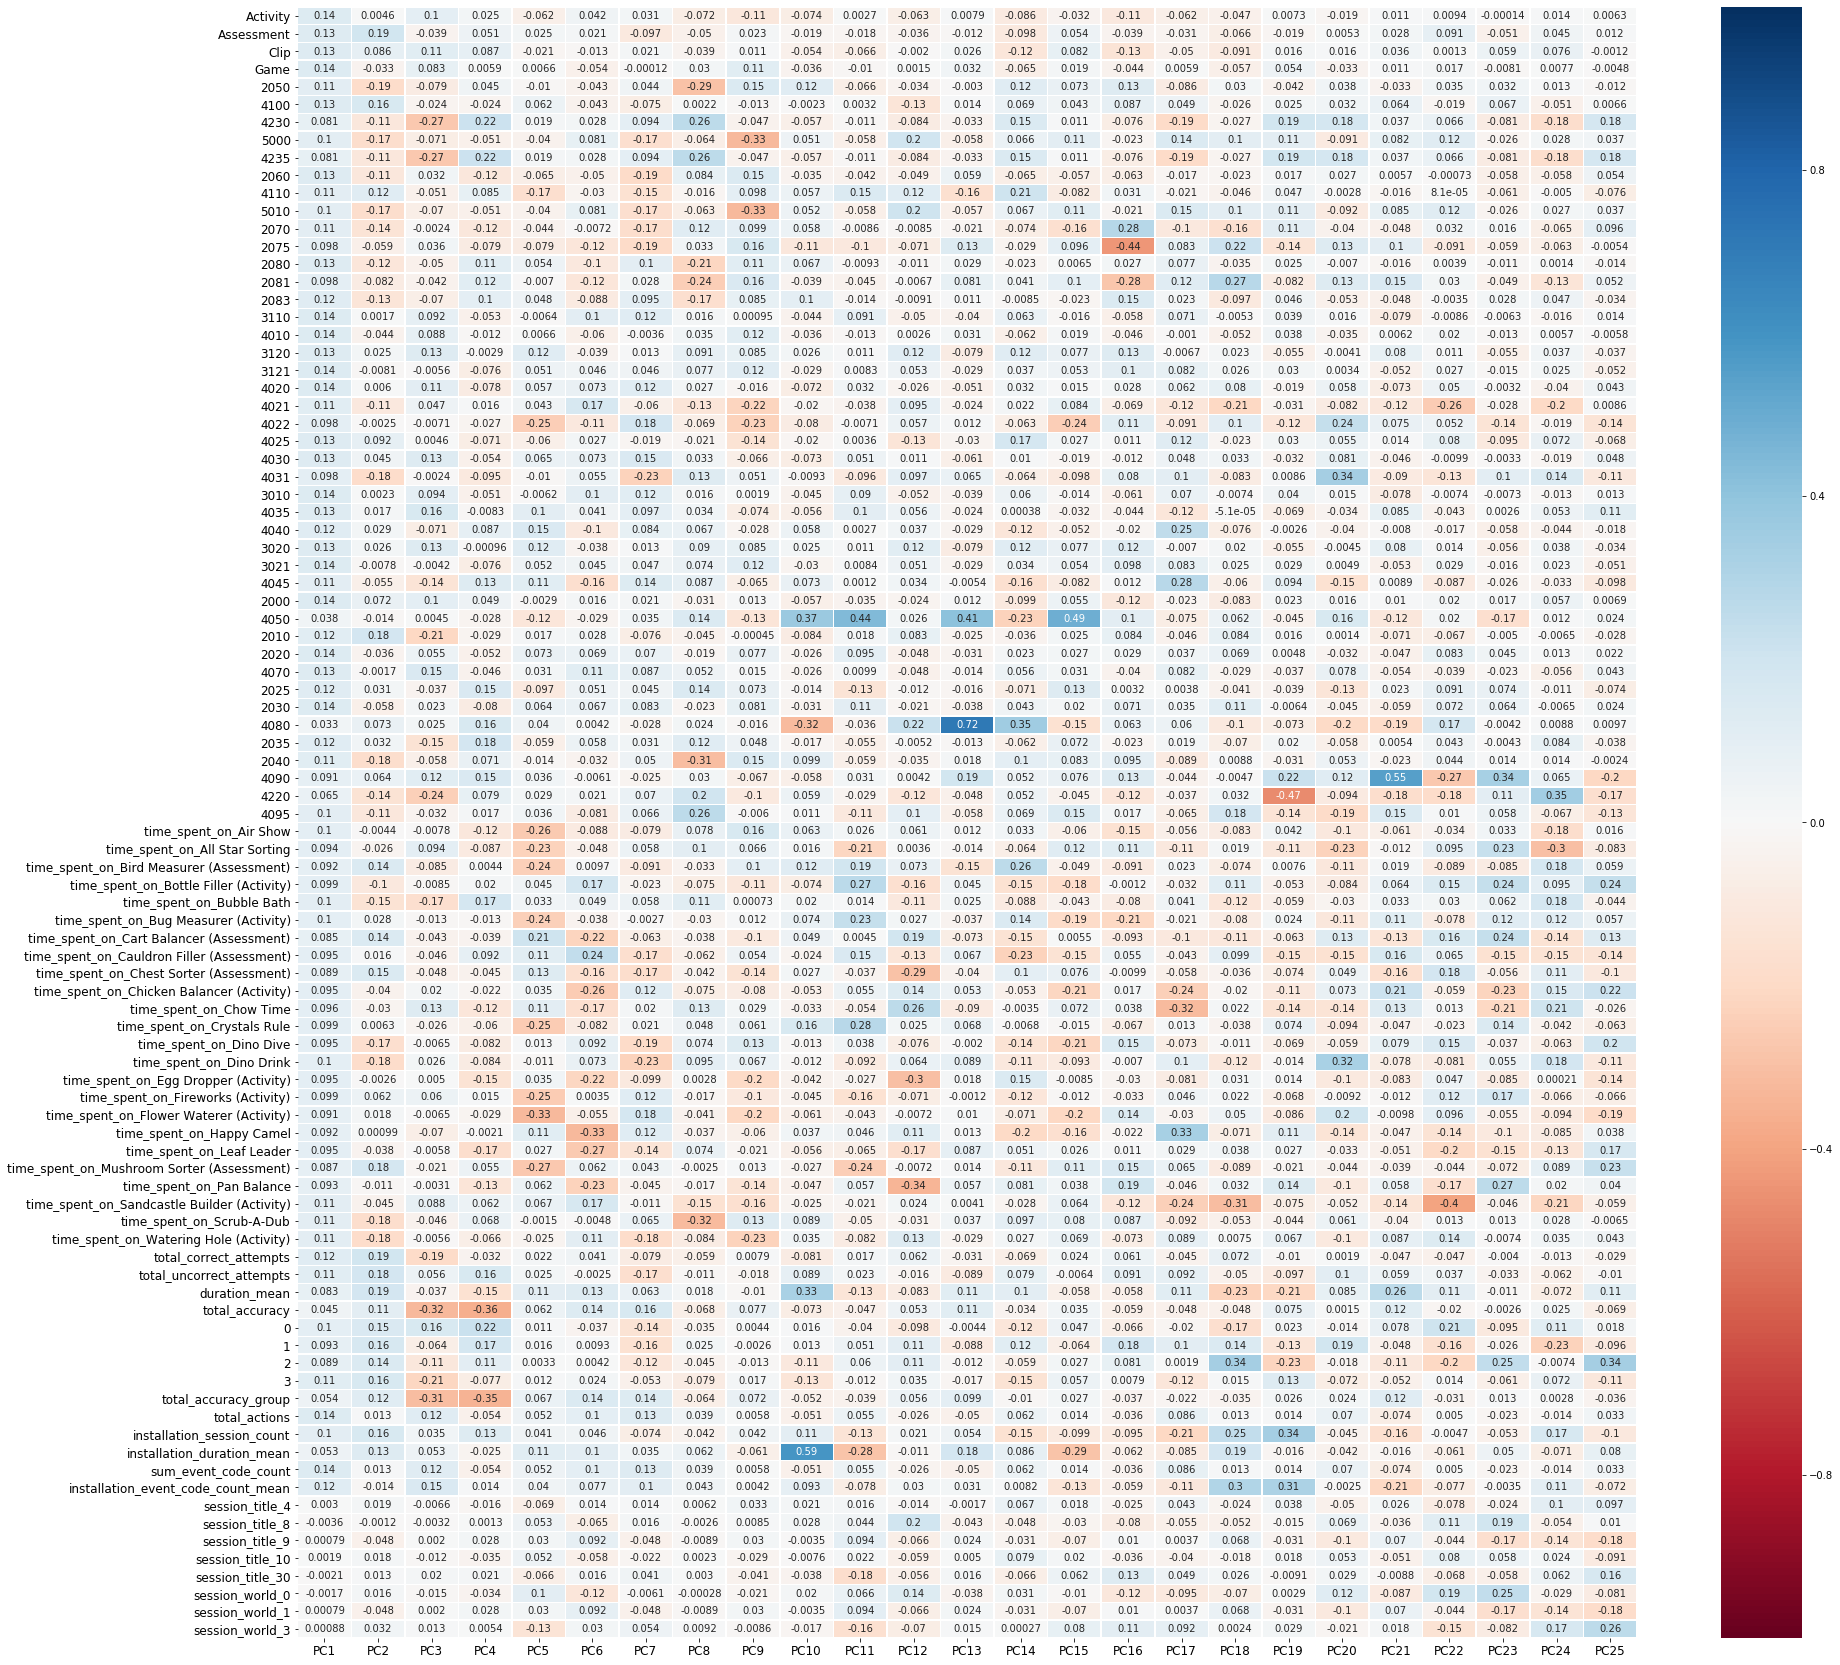

In [144]:
# Heatmap for loadings
plt.figure(figsize = (30,30))
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=12)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=12)
plt.show()

**Comments**

The blue shades in the plot above indicates which parameters are the most important. For example, the loading factors for PC10 show that installattion duration mean is the most dominant parameter. This means that high installation duration mean  will have high absolute value of PC10. While the red color in heatmap identifies the parameters which are  least important. 

## 13 Modeling

## 13.1 Naive Bayes Classifier

In [153]:
## Splitting data into train and test set

x_train,x_test, y_train, y_test = train_test_split(x_new, y, test_size = 0.3,stratify = y, random_state = 0)

#Fitting Classifier to the training set

classifier = GaussianNB()
classifier.fit(x_train, y_train)

# Predicting the test set results

y_pred = classifier.predict(x_test)

In [154]:
# Making the confusion matrix
cm_b = confusion_matrix(y_test, y_pred)

In [155]:
cm_b

array([[ 834,    9,    0, 1146],
       [ 196,    9,    0,  518],
       [ 126,   12,    0,  524],
       [ 465,   24,    0, 2165]], dtype=int64)

In [156]:
#acuuracy of the model
accuracy_score(y_test,y_pred)

0.49900464499004643

In [157]:
# Accuracy on training data
classifier.score(x_train,y_train) 

0.5013866173647159

In [158]:
# Accuracy on test data
classifier.score(x_test,y_test)

0.49900464499004643

In [159]:
#Applying 10 fold cross validation for evaluation of model 

accuracies = cross_val_score(estimator = classifier, X= x_train, y= y_train, cv = 10)

In [160]:
accuracies.mean()

0.5000381613596038

In [161]:
accuracies.std()# low bias, Low Variance

0.0073812940388651655

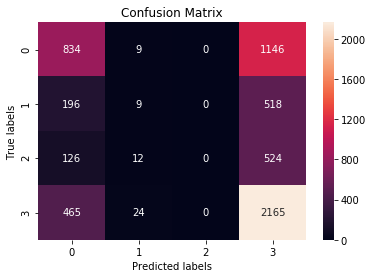

In [164]:
#Evaluating the performance of the model 
ax= plt.subplot()
sns.heatmap(cm_b, annot=True,fmt="d", ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

In [165]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.42      0.46      1989
           1       0.17      0.01      0.02       723
           2       0.00      0.00      0.00       662
           3       0.50      0.82      0.62      2654

    accuracy                           0.50      6028
   macro avg       0.29      0.31      0.28      6028
weighted avg       0.41      0.50      0.43      6028



## 13.2 K Nearest Neighbourhood

In [166]:
## Splitting data into train and test set
X_train,X_test, Y_train, Y_test = train_test_split(x_new, y, test_size = 0.3,stratify = y, random_state = 0)
#Fitting classifier to training data
classify = KNeighborsClassifier(n_neighbors = 72, metric = 'minkowski', p=2)
classify.fit(X_train, Y_train)
# predicting the test set results
Y_pred = classify.predict(X_test)

In [167]:
# Making the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

In [168]:
cm

array([[ 856,    0,    0, 1133],
       [ 161,    2,    0,  560],
       [  83,    0,    0,  579],
       [ 303,    1,    0, 2350]], dtype=int64)

In [169]:
accuracy_score(Y_test,Y_pred)

0.5321831453218314

In [170]:
classify.score(X_train,Y_train)# Training set accuracy

0.5371542345161061

In [171]:
classify.score(X_test,Y_test)

0.5321831453218314

In [172]:
#Evaluating Model Performance
#Applying cross validation
accuracies = cross_val_score(estimator = classify, X= X_train, y= Y_train, cv = 10)

In [173]:
accuracies.mean()

0.5237880458742384

In [174]:
accuracies.std()

0.009407229963400347

In [175]:
# Improving model Performance
#Applying Grid Search to find the best model and parameter
parameters = [{'n_neighbors':np.arange(1,100)}]
grid_search = GridSearchCV(estimator = classify, param_grid=parameters, scoring = 'accuracy' , cv = 10, n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)

In [102]:
best_accuracy = grid_search.best_score_

In [62]:
best_accuracy

0.5280626665589921

In [63]:
best_parameters = grid_search.best_params_

In [64]:
best_parameters

{'n_neighbors': 74}

In [65]:
#import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.52      0.23      0.32      1269
           1       1.00      0.00      0.00       723
           2       0.00      0.00      0.00       662
           3       0.53      0.94      0.68      2653

    accuracy                           0.53      5307
   macro avg       0.51      0.29      0.25      5307
weighted avg       0.52      0.53      0.41      5307



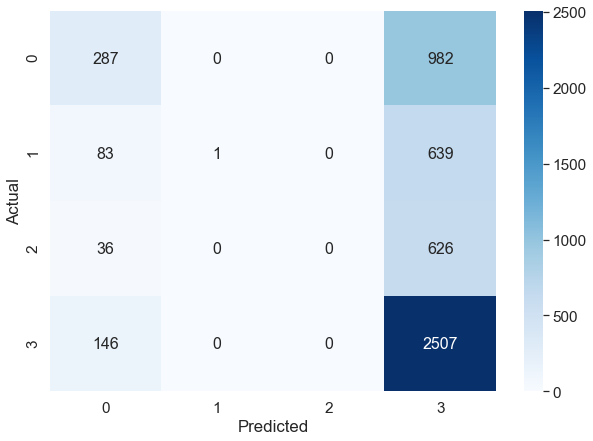

In [66]:
#plotting Confusion Matrix
df =confusion_matrix(Y_test, Y_pred)
df_cm = pd.DataFrame(df, columns=np.unique(Y_test), index = np.unique(Y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt="d")# font size


**Comment**

In order to predict the number of attempts a user will take to pass an assessment, a Gaussian Naive Bayes and KNN models were built due to the fact that they both are faster and work well for large multi class dataset.By considering the distribution of accuracy group ,class imbalance can be observed with classes 0 and 3 being the dominant ones. Naive bayes made 50% and 49% correct predictions on train and test data respectively; whereas KNN achieved 53% accuracy on both train and test dataset.Ten fold cross validation has been applied to evaluate the performance of both models. The mean accuracy and variance on ten folds of cross validation for naive bayes model are 50% and 0.07 respectively which implies Low bias and low variance; similarly for KNN, mean accuracy and variance are 52% and 0.09 which again implies low bias and low variance.


### Conclusion and Future Work

Our models did not achieve reasonably good accuracies, which i believe is partly due to feature engineering. More specifically, features around assessment complexity were not captured as part of this project due to lack of time. Future work would consist of exploring the 'event_data' column within the dataset and constructing features around assessment complexity. In this project we considered features such as the data prior to attempting the assessment i.e. number of times player has played a game, prior assessment results etc..,but these were not suffice in producing the results we required. Furthermore, as part of exploratory data analysis we attempted to look for significant correlations between the features and acuuracy group, however, failed to achieve any substantial correlation.

### References

[1]  Kaggle.com. (2019). 2019 Data Science Bowl | Kaggle. [online] Available at: https://www.kaggle.com/c/data-science-bowl-2019/overview [Accessed 15 Dec. 2019].